# Format MLST dataframe

## Generate `MLST Types`

mlst fasta/ECOLI/*.fasta > ~/workspace/genome_data/annotations/s_aureus/mlst/mlst_saur.tsv

## Read MLST output

In [1]:
import os
from pathlib import Path

import pandas as pd


mlstOutputDir = Path(os.environ['GENOMICS_DATA_BASE'], 'annotations', 'e_coli', 'mlst')
mlstOutputFile = Path(mlstOutputDir, 'mlst_ecoli.tsv')

mlstOutputDf = pd.read_csv(mlstOutputFile, sep='\t', names=['file_name', 'species', 'mlst_type', 'mlst_type_1', 'mlst_type_2', 'mlst_type_3', 'mlst_type_4', 'mlst_type_5', 'mlst_type_6', 'mlst_type_7'])
mlstOutputDf

,file_name,species,mlst_type,mlst_type_1,mlst_type_2,mlst_type_3,mlst_type_4,mlst_type_5,mlst_type_6,mlst_type_7
0,fasta/ECOLI/AH18J011_short.fasta,ecoli_achtman_4,-,adk(53),fumC(40),gyrB(~47),icd(13),mdh(36),purA(28),recA(29)
1,fasta/ECOLI/AH18J016_short.fasta,ecoli_achtman_4,69,adk(21),fumC(35),gyrB(27),icd(6),mdh(5),purA(5),recA(4)
2,fasta/ECOLI/AH18J019_short.fasta,ecoli_achtman_4,73,adk(36),fumC(24),gyrB(9),icd(13),mdh(17),purA(11),recA(25)
3,fasta/ECOLI/AH18J032_short.fasta,ecoli_achtman_4,59,adk(27),fumC(32),gyrB(24),icd(29),mdh(26),purA(19),recA(22)
4,fasta/ECOLI/AH18J033_short.fasta,ecoli_achtman_4,547,adk(13),fumC(52),gyrB(10),icd(119),mdh(17),purA(37),recA(25)
...,...,...,...,...,...,...,...,...,...,...
872,fasta/ECOLI/CPO438_flye_super_medaka_polypolis...,ecoli_achtman_4,967,adk(46),fumC(4),gyrB(87),icd(29),mdh(77),purA(127),recA(22)
873,fasta/ECOLI/CPO478_medaka_polypolish_polca.fasta,ecoli_achtman_4,131,adk(53),fumC(40),gyrB(47),icd(13),mdh(36),purA(28),recA(29)
874,fasta/ECOLI/CPO513_medaka_polypolish_polca.fasta,ecoli_achtman_4,1231,adk(37),fumC(38),gyrB(19),icd(37),mdh(151),purA(11),recA(26)
875,fasta/ECOLI/CPO526_medaka_polypolish_polca.fasta,ecoli_achtman_4,12,adk(13),fumC(13),gyrB(9),icd(13),mdh(16),purA(10),recA(9)


## Explore mlst output

### Species

In [2]:
mlstOutputDf.species.value_counts()

species
ecoli_achtman_4        876
senterica_achtman_2      1
Name: count, dtype: int64

In [3]:
mlstOutputDf = mlstOutputDf[mlstOutputDf.species == 'ecoli_achtman_4']
mlstOutputDf.species.value_counts()

species
ecoli_achtman_4    876
Name: count, dtype: int64

### MLST Type

<Axes: >

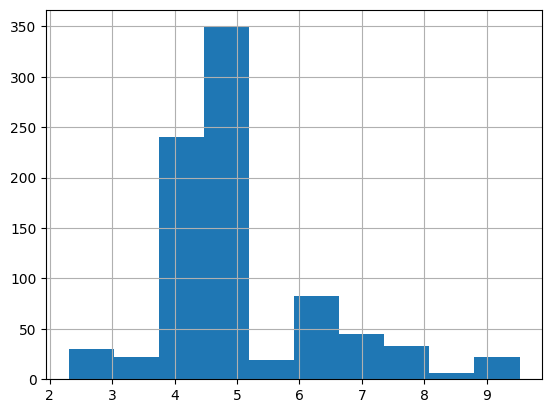

In [4]:
from math import log

mlstOutputDf.mlst_type.replace('-', None).apply(lambda x: (log(int(x)) if x else None)).hist()

In [5]:
mlstOutputDf.mlst_type.value_counts().reset_index().sort_values(by=['count'], ascending=False)[:20]

,mlst_type,count
0,95,141
1,73,134
2,131,130
3,69,60
4,127,41
5,-,27
6,1193,26
7,80,19
8,12,17
9,38,17


### MLST Type 1

In [6]:
mlstOutputDf.mlst_type_1.apply(lambda x: x[:3]).value_counts()

mlst_type_1
adk    876
Name: count, dtype: int64

### MLST Type 2

In [7]:
mlstOutputDf.mlst_type_2.apply(lambda x: x[:4]).value_counts()


mlst_type_2
fumC    876
Name: count, dtype: int64

### MLST Type 3

In [8]:
mlstOutputDf.mlst_type_3.apply(lambda x: x[:4]).value_counts()

mlst_type_3
gyrB    876
Name: count, dtype: int64

### MLST Type 4

In [9]:
mlstOutputDf.mlst_type_4.apply(lambda x: x[:3]).value_counts()

mlst_type_4
icd    876
Name: count, dtype: int64

### MLST Type 5

In [10]:
mlstOutputDf.mlst_type_5.apply(lambda x: x[:3]).value_counts()

mlst_type_5
mdh    876
Name: count, dtype: int64

### MLST Type 6

In [11]:
mlstOutputDf.mlst_type_6.apply(lambda x: x[:4]).value_counts()

mlst_type_6
purA    876
Name: count, dtype: int64

### MLST Type 7

In [12]:
mlstOutputDf.mlst_type_7.apply(lambda x: x[:4]).value_counts()

mlst_type_7
recA    876
Name: count, dtype: int64

## Format output

In [13]:
mlstOutputDf

,file_name,species,mlst_type,mlst_type_1,mlst_type_2,mlst_type_3,mlst_type_4,mlst_type_5,mlst_type_6,mlst_type_7
0,fasta/ECOLI/AH18J011_short.fasta,ecoli_achtman_4,-,adk(53),fumC(40),gyrB(~47),icd(13),mdh(36),purA(28),recA(29)
1,fasta/ECOLI/AH18J016_short.fasta,ecoli_achtman_4,69,adk(21),fumC(35),gyrB(27),icd(6),mdh(5),purA(5),recA(4)
2,fasta/ECOLI/AH18J019_short.fasta,ecoli_achtman_4,73,adk(36),fumC(24),gyrB(9),icd(13),mdh(17),purA(11),recA(25)
3,fasta/ECOLI/AH18J032_short.fasta,ecoli_achtman_4,59,adk(27),fumC(32),gyrB(24),icd(29),mdh(26),purA(19),recA(22)
4,fasta/ECOLI/AH18J033_short.fasta,ecoli_achtman_4,547,adk(13),fumC(52),gyrB(10),icd(119),mdh(17),purA(37),recA(25)
...,...,...,...,...,...,...,...,...,...,...
872,fasta/ECOLI/CPO438_flye_super_medaka_polypolis...,ecoli_achtman_4,967,adk(46),fumC(4),gyrB(87),icd(29),mdh(77),purA(127),recA(22)
873,fasta/ECOLI/CPO478_medaka_polypolish_polca.fasta,ecoli_achtman_4,131,adk(53),fumC(40),gyrB(47),icd(13),mdh(36),purA(28),recA(29)
874,fasta/ECOLI/CPO513_medaka_polypolish_polca.fasta,ecoli_achtman_4,1231,adk(37),fumC(38),gyrB(19),icd(37),mdh(151),purA(11),recA(26)
875,fasta/ECOLI/CPO526_medaka_polypolish_polca.fasta,ecoli_achtman_4,12,adk(13),fumC(13),gyrB(9),icd(13),mdh(16),purA(10),recA(9)


In [14]:
mlstOutputDf['tube_code'] = mlstOutputDf.file_name.str[12:20]
mlstOutputDf['adk'] = mlstOutputDf.mlst_type_1.str.strip('adk').str.strip('(').str.strip(')')
mlstOutputDf['fumC'] = mlstOutputDf.mlst_type_2.str.strip('fumC').str.strip('(').str.strip(')')
mlstOutputDf['gyrB'] = mlstOutputDf.mlst_type_3.str.strip('gyrB').str.strip('(').str.strip(')')
mlstOutputDf['icd'] = mlstOutputDf.mlst_type_4.str.strip('icd').str.strip('(').str.strip(')')
mlstOutputDf['mdh'] = mlstOutputDf.mlst_type_5.str.strip('mdh').str.strip('(').str.strip(')')
mlstOutputDf['purA'] = mlstOutputDf.mlst_type_6.str.strip('purA').str.strip('(').str.strip(')')
mlstOutputDf['recA'] = mlstOutputDf.mlst_type_7.str.strip('recA').str.strip('(').str.strip(')')
mlstOutputDf = mlstOutputDf.drop(columns=['file_name', 'mlst_type_1', 'mlst_type_2', 'mlst_type_3', 'mlst_type_4', 'mlst_type_5', 'mlst_type_6', 'mlst_type_7'])
mlstOutputDf

/tmp/ipykernel_9295/3401760905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlstOutputDf['tube_code'] = mlstOutputDf.file_name.str[12:20]
/tmp/ipykernel_9295/3401760905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlstOutputDf['adk'] = mlstOutputDf.mlst_type_1.str.strip('adk').str.strip('(').str.strip(')')
/tmp/ipykernel_9295/3401760905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,species,mlst_type,tube_code,adk,fumC,gyrB,icd,mdh,purA,recA
0,ecoli_achtman_4,-,AH18J011,53,40,~47,13,36,28,29
1,ecoli_achtman_4,69,AH18J016,21,35,27,6,5,5,4
2,ecoli_achtman_4,73,AH18J019,36,24,9,13,17,11,25
3,ecoli_achtman_4,59,AH18J032,27,32,24,29,26,19,22
4,ecoli_achtman_4,547,AH18J033,13,52,10,119,17,37,25
...,...,...,...,...,...,...,...,...,...,...
872,ecoli_achtman_4,967,CPO438_f,46,4,87,29,77,127,22
873,ecoli_achtman_4,131,CPO478_m,53,40,47,13,36,28,29
874,ecoli_achtman_4,1231,CPO513_m,37,38,19,37,151,11,26
875,ecoli_achtman_4,12,CPO526_m,13,13,9,13,16,10,9


In [16]:
topMlstTypesList = mlstOutputDf[mlstOutputDf.mlst_type != '-'].mlst_type.value_counts().reset_index().sort_values(by=['count'], ascending=False).mlst_type[:10]
topMlstTypesList

0      95
1      73
2     131
3      69
4     127
5    1193
6      80
7      12
8      38
9     349
Name: mlst_type, dtype: object

In [17]:
mlstOutputDf = mlstOutputDf[mlstOutputDf.mlst_type.isin(topMlstTypesList)]
mlstOutputDf

,species,mlst_type,tube_code,adk,fumC,gyrB,icd,mdh,purA,recA
1,ecoli_achtman_4,69,AH18J016,21,35,27,6,5,5,4
2,ecoli_achtman_4,73,AH18J019,36,24,9,13,17,11,25
7,ecoli_achtman_4,73,AH18J044,36,24,9,13,17,11,25
8,ecoli_achtman_4,73,AH18J061,36,24,9,13,17,11,25
12,ecoli_achtman_4,73,AH18J083,36,24,9,13,17,11,25
...,...,...,...,...,...,...,...,...,...,...
870,ecoli_achtman_4,131,CPO336_f,53,40,47,13,36,28,29
871,ecoli_achtman_4,38,CPO355_m,4,26,2,25,5,5,19
873,ecoli_achtman_4,131,CPO478_m,53,40,47,13,36,28,29
875,ecoli_achtman_4,12,CPO526_m,13,13,9,13,16,10,9


## Save formatted mlst output

In [18]:
import os
from pathlib import Path

import pandas as pd


mlstOutputFormattedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'annotations', 'e_coli', 'mlst')
mlstOutputFormattedFile = Path(mlstOutputFormattedDir, 'mlst_ecoli.csv')


mlstOutputDf.to_csv(mlstOutputFormattedFile, index=False)